In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Weight,Height,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,66.00,140,NaN,NaN,NaN,NaN
1,1,72.00,145,NaN,NaN,NaN,NaN
2,1,73.50,160,NaN,NaN,NaN,NaN
3,1,73.00,190,NaN,NaN,NaN,NaN
4,1,69.00,155,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
87,2,64.00,125,NaN,NaN,NaN,NaN
88,2,68.00,133,NaN,NaN,NaN,NaN
89,2,62.00,110,NaN,NaN,NaN,NaN
90,2,67.00,150,NaN,NaN,NaN,NaN


In [39]:
data.drop(columns=[col for col in data.columns if col not in ['Weight', 'Height']], axis=1, inplace=True)

In [40]:
data

,Weight,Height
0,66.00,140
1,72.00,145
2,73.50,160
3,73.00,190
4,69.00,155
...,...,...
87,64.00,125
88,68.00,133
89,62.00,110
90,67.00,150


Text(0, 0.5, 'Weight')

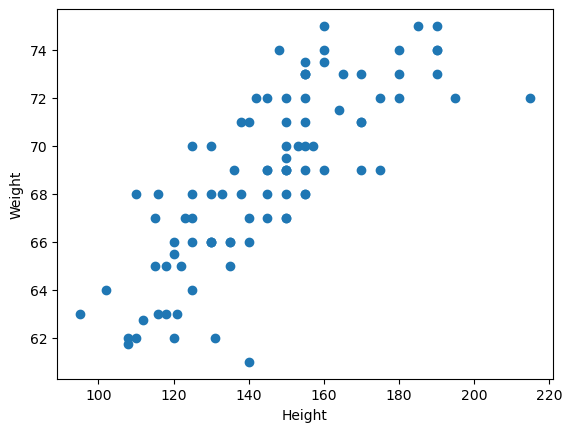

In [41]:
### Scatter plot

plt.scatter(data['Height'], data['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [42]:
### Correlation or seaborn in order to find the relationship
data.corr()

,Weight,Height
Weight,1.000000,0.784866
Height,0.784866,1.000000


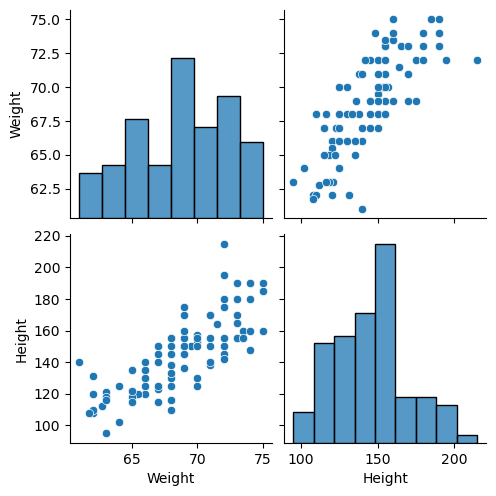

In [43]:
import seaborn as sns
sns.pairplot(data)

In [44]:
## Independent (should in 2 dimensional or data frame like below) and dependent features
X = data[['Height']]
y = data['Weight']

In [45]:
X.shape
X.head()

,Height
0,140
1,145
2,160
3,190
4,155


In [46]:
y.shape

(92,)

In [47]:
## Train and test split
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
## Standaridization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression = LinearRegression()

In [53]:
regression.fit(X_train, y_train)

LinearRegression()

In [54]:
print("Coefficent or slope", regression.coef_)
print("Intercept", regression.intercept_)

Coefficent or slope [2.87646685]
Intercept 68.71014492753623


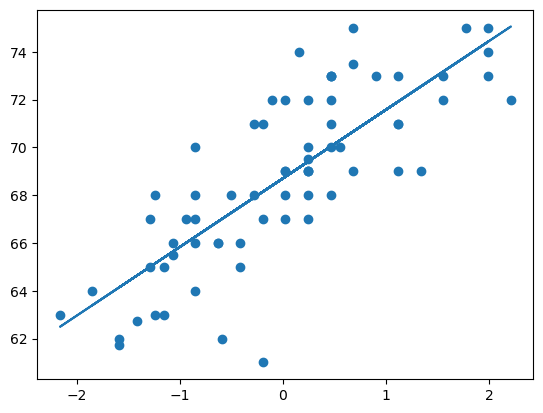

In [55]:
### Plot training data for best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [56]:
### Predictation for test data
y_pred = regression.predict(X_test)

In [57]:
y_pred

array([69.40583059, 66.89262061, 70.03413308, 65.63601563, 68.1492256 ,
       66.89262061, 77.573763  , 70.03413308, 70.66243557, 69.40583059,
       64.37941064, 74.43225053, 64.37941064, 71.16507757, 69.78281208,
       70.03413308, 73.17564555, 65.76167613, 67.52092311, 67.64658361,
       72.54734305, 66.89262061, 65.88733662])

In [58]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(r2_score(y_test, y_pred))

5.649057932776859
1.9659779026327016
2.3767746912100987
0.5780654223171255


In [60]:
### OLS prdiction

import statsmodels.api as stat
model = stat.OLS(y_train, X_train).fit()

In [61]:
prediction = model.predict(X_test)
print(prediction)
print(model.summary())

[ 0.69568566 -1.81752431  1.32398815 -3.0741293  -0.56091933 -1.81752431
  8.86361807  1.32398815  1.95229065  0.69568566 -4.33073429  5.72210561
 -4.33073429  2.45493264  1.07266716  1.32398815  4.46550062 -2.9484688
 -1.18922182 -1.06356132  3.83719813 -1.81752431 -2.8228083 ]
                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.013
Method:                 Least Squares   F-statistic:                             0.1191
Date:                Thu, 13 Feb 2025   Prob (F-statistic):                       0.731
Time:                        06:18:10   Log-Likelihood:                         -389.81
No. Observations:                  69   AIC:                                      781.6
Df Residuals:                      68   BIC:                                      783.8
Df Model:       

In [62]:
### Prediction with new data

regression.predict(scaler.transform([[160]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([70.66243557])